In [85]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('F:/Education/DS_Roadmap/ml/9_decision_tree/Exercise/titanic.csv')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
input = df[['Pclass', 'Sex', 'Age', 'Fare']]

In [56]:
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [57]:
output= df["Survived"]

In [58]:
output

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
input['Sex_n'] = le.fit_transform(input['Sex'])

C:\Users\Aditya Zarekar\AppData\Local\Temp\ipykernel_16716\3516958702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['Sex_n'] = le.fit_transform(input['Sex'])


In [15]:
input

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [17]:
input_n = input.drop('Sex', axis='columns')

In [18]:
input_n

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [63]:
input_n.isna().sum()

Pclass    0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [62]:
input_n.Age = input_n.Age.fillna(input_n.Age.mean())

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
input_n

,Pclass,Age,Fare,Sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [65]:
model = DecisionTreeClassifier()
X = input_n
y = output

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
X_train.shape, X_test.shape

((712, 4), (179, 4))

In [68]:
y_train.shape, y_test.shape

((712,), (179,))

In [69]:
X_train.describe()

,Pclass,Age,Fare,Sex_n
count,712.000000,712.000000,712.000000,712.000000
mean,2.289326,29.718184,34.312809,0.648876
std,0.847267,12.946461,52.905539,0.477657
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,22.000000,7.925000,0.000000
50%,3.000000,29.699118,15.022900,1.000000
75%,3.000000,35.000000,33.125000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [43]:
X_train.Age.mean()

29.577402135231317

In [44]:
X_train = X_train.fillna(X_train.Age.mean())

In [45]:
X_train.isnull().sum()

Pclass    0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [46]:
X_train

,Pclass,Age,Fare,Sex_n
219,2,30.000000,10.5000,1
286,3,30.000000,9.5000,1
33,2,66.000000,10.5000,1
695,2,52.000000,13.5000,1
132,3,47.000000,14.5000,0
...,...,...,...,...
383,1,35.000000,52.0000,0
828,3,29.577402,7.7500,1
257,1,30.000000,86.5000,0
689,1,15.000000,211.3375,0


In [73]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
X_train.shape, X_test.shape

((712, 4), (179, 4))

In [77]:
y_train.shape, y_test.shape

((712,), (179,))

In [79]:
y_pred = model.predict(X_test)

In [80]:
model.score(X_test, y_test)

0.776536312849162

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [84]:
cm

array([[91, 22],
       [18, 48]], dtype=int64)

Text(50.722222222222214, 0.5, 'true value')

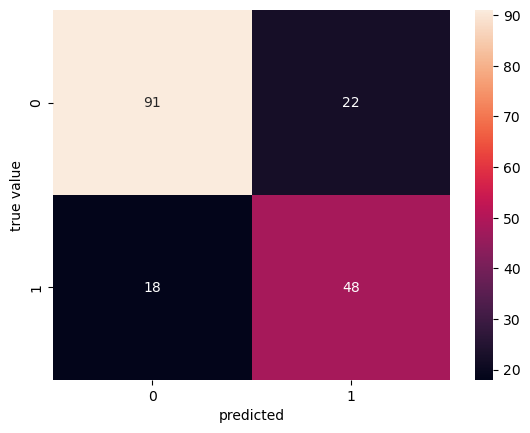

In [86]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('true value')